In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib_inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import data set

In [ ]:
Train_set = pd.read_csv("train.csv")
Eval_set = pd.read_csv("test.csv")

# Data preprocessing

In [ ]:
# Check for 'Nan' in the dataframe :
Columns = Eval_set.axes[1].values
train_NaN = []
Eval_NaN = []
for i in Columns :
  x = Train_set[i].isnull().sum().sum()
  train_NaN.append(x)

  y = Eval_set[i].isnull().sum().sum()
  Eval_NaN.append(y)

train_NaN , Eval_NaN

([0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2], [0, 0, 0, 0, 86, 0, 0, 0, 1, 327, 0])

In [ ]:
# # add a Cobin ALphabet column : # Not necessary because almost 700 of the total 891 rows are NaN

# ## Column Cabin :
# # note : there is a lot , so lets make a new value called 'dk' ( Dont know :P )
# Eval_set['Cabin']= Eval_set['Cabin'].fillna(' dk')
# Train_set['Cabin']= Train_set['Cabin'].fillna(' dk')

# ## for train set
# Cabins = Train_set['Cabin'].values
# alphabet = []
# for i,v in enumerate(Cabins) :
#   alphabet.append(v[0])
# alphabet
# Train_set.insert(8,'Cabin alphabet', alphabet)

# ## for train set
# Cabins = Eval_set['Cabin'].values
# alphabet = []
# for i,v in enumerate(Cabins) :
#   alphabet.append(v[0])
# alphabet
# Eval_set.insert(8,'Cabin alphabet', alphabet)

## Column Cabin  Alphabet :
# note : there is a lot , so lets make a new value called 'dk' ( Dont know :P )

# Eval_set['Cabin alphabet']= Eval_set['Cabin alphabet'].replace(' ','dk')
# Train_set['Cabin alphabet']= Train_set['Cabin alphabet'].replace(' ','dk')

# # Train_set['Cabin alphabet'].unique()
# pd.Series(Train_set["Cabin alphabet"].values).value_counts()

Removing NaN data

In [ ]:
# Removing Useless columns :
Train_set = Train_set.drop(['Ticket', 'Name','Cabin'],axis = 1)
Eval_set = Eval_set.drop(['Ticket', 'Name','Cabin'],axis = 1)

# Removing NaN dataframe :

## Column Age :
mean = round(Train_set['Age'].mean())
Train_set['Age']= Train_set['Age'].fillna(mean)

mean = round(Eval_set['Age'].mean())
Eval_set['Age']= Eval_set['Age'].fillna(mean)

## Column Embarked
# note : Only 2 NaN , so just put random data
Eval_set['Embarked']= Eval_set['Embarked'].fillna('S')
Train_set['Embarked']= Train_set['Embarked'].fillna('S')

## Column Fare :
mean = int(Eval_set['Fare'].mean()*1000)/1000
Eval_set['Fare']= Eval_set['Fare'].fillna(mean)

In [ ]:
# Check for Nan in the dataframe Again :
Columns = Eval_set.axes[1].values
train_NaN = []
Eval_NaN = []
for i in Columns :
  x = Train_set[i].isnull().sum().sum()
  train_NaN.append(x)

  y = Eval_set[i].isnull().sum().sum()
  Eval_NaN.append(y)

train_NaN , Eval_NaN

([0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0])

Encode string value to a dummy value

In [ ]:
# Column Sex :
## note : encoded to 1 and 0 (male = 1 and female = 0)
le = LabelEncoder()
Eval_set['Sex'] = le.fit_transform(Eval_set['Sex'])
Train_set['Sex'] = le.fit_transform(Train_set['Sex'])

In [ ]:
# Encode Embarked column
Embarked_Encoder = LabelEncoder()
Train_set['Embarked'] = Embarked_Encoder.fit_transform(Train_set['Embarked'])
Eval_set['Embarked'] = Embarked_Encoder.transform(Eval_set['Embarked'])

# Encode Pclass column (it was a number but this way , it's categorized as a category not a number)
Class_Encoder = LabelEncoder()
Train_set['Pclass'] = Class_Encoder.fit_transform(Train_set['Pclass'])
Eval_set['Pclass'] = Class_Encoder.transform(Eval_set['Pclass'])


Normalization

In [ ]:
# Norming the Age Factor
normalizer1 = MinMaxScaler()
Train_set['Age'] = normalizer1.fit_transform(Train_set['Age'].values.reshape(-1,1))
Eval_set['Age'] = normalizer1.transform(Eval_set['Age'].values.reshape(-1,1))

# Norming the Age Factor
normalizer2 = MinMaxScaler()
Train_set['Fare'] = normalizer2.fit_transform(Train_set['Fare'].values.reshape(-1,1))
Eval_set['Fare'] = normalizer2.transform(Eval_set['Fare'].values.reshape(-1,1))

Check the data set

<ipython-input-10-b15fbeb1d43d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


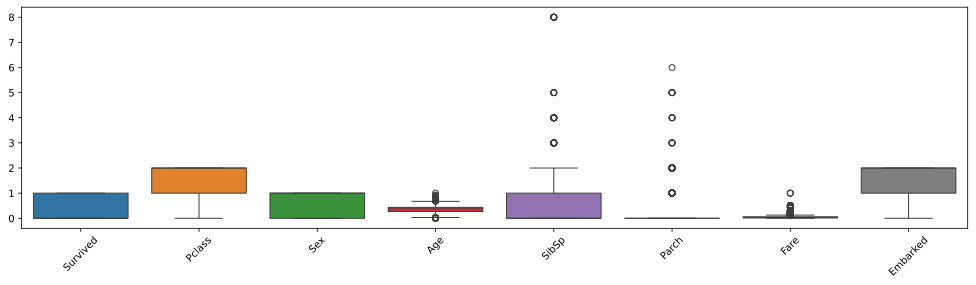

In [ ]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
x = Train_set.drop(['PassengerId'],axis = 1)
ax = sns.boxplot(data=x)
# ax = sns.boxplot(data=Train_set['Fare'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
Train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2,1,0.271174,1,0,0.014151,2
1,2,1,0,0,0.472229,1,0,0.139136,0
2,3,1,2,0,0.321438,0,0,0.015469,2
3,4,1,0,0,0.434531,1,0,0.103644,2
4,5,0,2,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...,...
886,887,0,1,1,0.334004,0,0,0.025374,2
887,888,1,0,0,0.233476,0,0,0.058556,2
888,889,0,2,0,0.371701,1,2,0.045771,2
889,890,1,0,1,0.321438,0,0,0.058556,0


In [ ]:
Eval_set

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,2,1,0.428248,0,0,0.015282,1
1,893,2,0,0.585323,1,0,0.013663,2
2,894,1,1,0.773813,0,0,0.018909,1
3,895,2,1,0.334004,0,0,0.016908,2
4,896,2,0,0.271174,1,1,0.023984,2
...,...,...,...,...,...,...,...,...
413,1305,2,1,0.371701,0,0,0.015713,2
414,1306,0,0,0.484795,0,0,0.212559,0
415,1307,2,1,0.478512,0,0,0.014151,2
416,1308,2,1,0.371701,0,0,0.015713,2


Get rid of Passenger Id

In [ ]:
Eval_PassengerId = Eval_set['PassengerId'] # save them for later
Eval_set = Eval_set.drop(['PassengerId'],axis=1)

Train_set = Train_set.drop(['PassengerId'],axis=1)

Seperating X from Y in Train set

In [ ]:
y = Train_set['Survived']
Train_set = Train_set.drop(['Survived'],axis=1)

In [ ]:
# Reshaping y
z = y.values.reshape((len(y),1))

# ANN Model

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
# Splite Trainset into test and train
train_data , test_data , train_labels , test_labels = train_test_split(Train_set , z , test_size= 0.2)

# Convert to Tensors

train_data = torch.tensor(train_data.values).float()
test_data = torch.tensor(test_data.values).float()
train_labels = torch.tensor(train_labels).float()
test_labels = torch.tensor(test_labels).float()
Eval_set = torch.tensor(Eval_set.values).float()

# Put data in DataLoader
x_train = TensorDataset(train_data,train_labels)
x_test  = TensorDataset(test_data,test_labels)
batches = 32
test_loader  = DataLoader(x_test,batch_size=x_test.tensors[0].shape[0])
train_loader = DataLoader(x_train,batch_size=batches ,shuffle=True,drop_last=False)

In [ ]:
Eval_set

tensor([[2.0000, 1.0000, 0.4282,  ..., 0.0000, 0.0153, 1.0000],
        [2.0000, 0.0000, 0.5853,  ..., 0.0000, 0.0137, 2.0000],
        [1.0000, 1.0000, 0.7738,  ..., 0.0000, 0.0189, 1.0000],
        ...,
        [2.0000, 1.0000, 0.4785,  ..., 0.0000, 0.0142, 2.0000],
        [2.0000, 1.0000, 0.3717,  ..., 0.0000, 0.0157, 2.0000],
        [2.0000, 1.0000, 0.3717,  ..., 1.0000, 0.0436, 0.0000]],
       dtype=torch.float64)

In [ ]:
class ANNModel(nn.Module) :

  def __init__ (self,epochs) :
    super().__init__()

    # input layer
    self.input = nn.Linear(7,256)

    # hidden layer
    self.hidden1 = nn.Linear(256,256)
    # self.hidden2 = nn.Linear(64,64)
    # self.hidden3 = nn.Linear(64,64)


    # output layer
    self.output = nn.Linear(256,1)

    # Model Properties
    self.epochs = epochs
    self.lossfunc = nn.BCEWithLogitsLoss()
    self.optimizer = torch.optim.AdamW(self.parameters(), weight_decay = .02 , lr = 0.015) # Use AdamW for Weight decay (L2 Regularization)
    # self.optimizer = torch.optim.SGD(self.parameters(), weight_decay = .01 , lr = 0.015)

  def forward (self,data) :
    x = F.relu(self.input(data))
    x = F.relu(self.hidden1(x))
    # x = F.relu(self.hidden2(x))
    # x = F.relu(self.hidden3(x))
    x = self.output(x)
    return x

In [ ]:
def trainTheModel (Model,trainData,testData):
  losses = []
  trainAcc = []
  testAcc = []
  # Train the model for n_epoch
  for epoch_i in range(Model.epochs):
    batchAcc = []
    batchLoss = []
    # Train by each batch
    for x,y in train_loader : # X is the training dataset , y is the labels
      # foward pass
      yHat = Model.forward(x)

      # loss calculation
      loss = Model.lossfunc(yHat , y)

      # Back Prob
      Model.optimizer.zero_grad()
      loss.backward()
      Model.optimizer.step()

      # compute batch acc and loss
      # here I used (Model.forward(X) > .5) Because the out put is just 1 number , if it was a multi class classification i had to use torch.argmax()
      batchAcc.append( 100*torch.mean(((yHat > .5).float() == y).float()).item() )
      batchLoss.append( loss.item() )

    # save batch average acc and loss
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )
    # model validation using test data
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels =  (Model.forward(X) > .5).float() # .5 because if its about that , it's a '1'
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  return losses , trainAcc , testAcc

In [ ]:
# Creat and train the model and get the results
epochs = 500
Classification_Model = ANNModel(epochs)
losses , trainAcc , testAcc = trainTheModel(Classification_Model,x_train,test_loader)

In [ ]:
# Check the results
losses[-1] ,trainAcc[-1], testAcc[-1]

(0.31329264653765637, 86.54891304347827, 83.2402229309082)

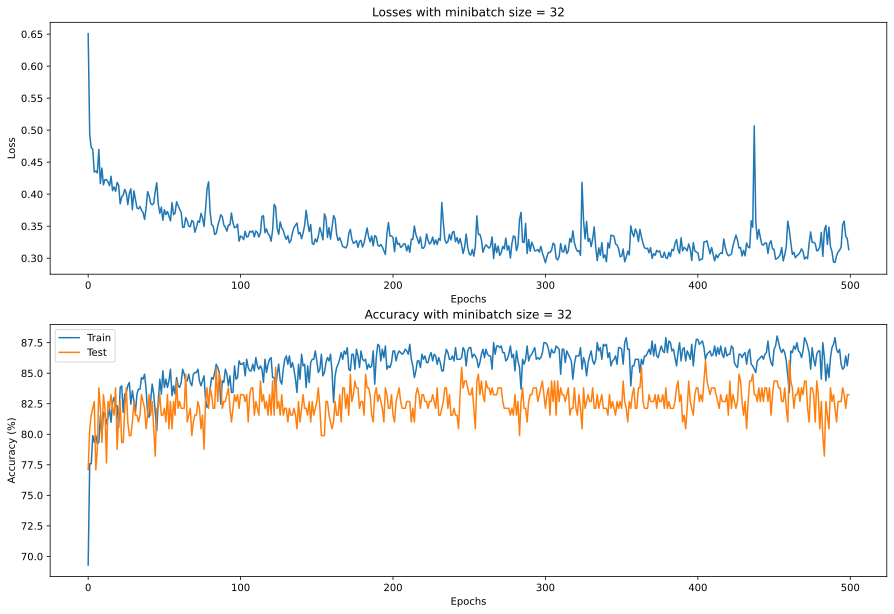

In [ ]:
# plot the resultt
fig,ax = plt.subplots(2,1,figsize=(15,10))


ax[0].plot(losses)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title(f'Losses with minibatch size = {batches}')

ax[1].plot(trainAcc)
ax[1].plot(testAcc)
ax[1].set_title(f'Accuracy with minibatch size = {batches}')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
# ax[1].set_ylim([27,103])

plt.show()

In [ ]:
# Save data into a CSV File needed for Kaggle submission
preds = Classification_Model.forward(Eval_set)
preds_tensor = (preds.detach() > .5).int()
preds_dataFrame = pd.DataFrame(preds_tensor.numpy(),columns=['Survived']) #convert to a dataframe
preds_dataFrame.insert(0 , 'PassengerId' , Eval_PassengerId)
preds_dataFrame

preds_dataFrame.to_csv("Final_preds.csv",index=False)